# Graph prediction figures for paper

env: figures_paper_gnn

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm

!pip install pandas holoviews bokeh
# Split the cell type pairs into separate columns
import ast
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42



# Figure 2: Merfish slide and results

Plot AUC scores

In [ ]:
auc_scores=r"C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\auc_records_up_toLamp5.csv"
auc_scores=pd.read_csv(auc_scores)
auc_scores.head(10)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cmap = cm.get_cmap('coolwarm_r')

# Grouping the data by 'Cell_Type' and calculating the mean and standard deviation of AUC
grouped = auc_scores.groupby('Cell_Type')['AUC'].agg([np.mean, 'std'])

# Define color-blind friendly color palette
colors = ['#5DA5DA',  # light cyan/teal
                  '#60BD68',  # light green
                  '#F15854',  # light red/pink
                  '#B276B2',  # purple
                  '#DECF3F']
# Set font to Arial
plt.rcParams['font.family'] = 'DejaVu Sans'
#change for to not bold
plt.rcParams['font.weight'] = 'normal'

# Plot
plt.figure(figsize=(6, 3))

# Plotting the means and standard deviations for each cell type using the color-blind friendly palette
plt.errorbar(grouped.index, grouped['mean'], yerr=grouped['std'], fmt='o', 
             color=colors[0], ecolor=colors[0], elinewidth=1, capsize=2,markersize=1)

# Adding labels and title
plt.ylabel('AUC', fontsize=16)

# Styling to match a publication style
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
# Removing the top and right spines
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ensuring only the bottom and left spines are visible
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
#save as PDF
plt.savefig('figures/auc_all_cells.pdf', format='pdf')

# Display the plot
plt.show()


Node values

note: colour bar is wrong so create own bar

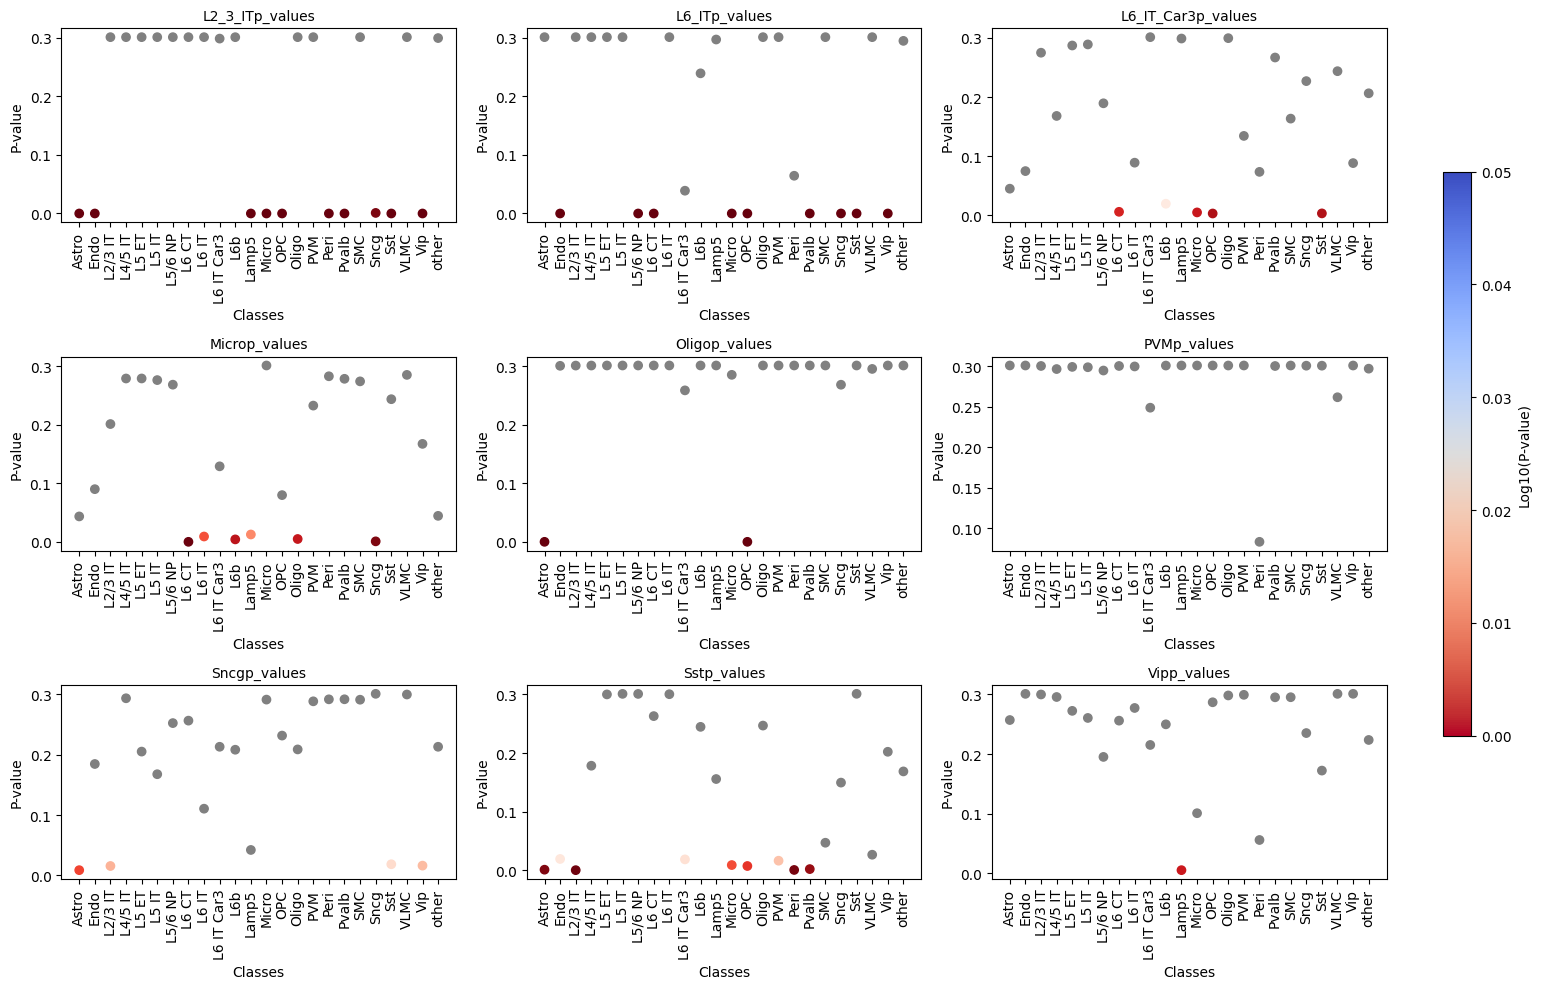

In [ ]:

directory = r"C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results"

# Find all files ending with "CORRECT.csv"
csv_files = glob.glob(os.path.join(directory, '*CORRECT.csv'))

# Number of files
n_files = len(csv_files)

# Set up the subplot grid
n_cols = int(np.ceil(np.sqrt(n_files))) if n_files > 0 else 1
n_rows = int(np.ceil(n_files / n_cols))

# Set up the figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
axes = axes.flatten()
red_cmap = plt.get_cmap('Reds')

# Loop over all files and plot their data
for i, file in enumerate(csv_files):
    # Read the CSV file into a dataframe
    df = pd.read_csv(file, index_col=0)
    
    # Assuming p-values are in the second row (index 1)
    p_values = df.iloc[1, :].astype(float).values
    
    # Create an array of x-values (indices)
    x = np.arange(len(p_values))
    
    # Apply logarithmic transformation to p-values
    
    # Normalize p-values for color mapping; note: colour bar is wrong so create own bar
    colors = []
    

    for p in p_values:
        if p < 0.05:
            norm = mcolors.Normalize(vmin=0, vmax=0.05)  # Standard normalization
            inverted_value = 1 - norm(p)  # Invert normalized value (0 -> 1, 0.05 -> 0)
            colors.append(red_cmap(inverted_value))  
        else:
            # Non-significant p-values are gray
            colors.append('gray')
    p_values = np.log10(p_values + 1)
    # Plot data points with color
    axes[i].scatter(x, p_values, color=colors)
    
    # Set title and labels
    title_name = os.path.basename(file)[:-24]  
    axes[i].set_title(title_name, fontsize=10)
    axes[i].set_ylabel('P-value')
    axes[i].set_xlabel('Classes')
    
    # Rotate the x-axis labels
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(df.columns, rotation=90)
    
    # Set y-axis to logarithmic scale
    #axes[i].set_yscale('log')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label='Log10(P-value)')
#save as merfish
plt.savefig('merfish_p_values_log_plt.pdf', format='pdf')
plt.show()  

# EMT GNN results

C:\Users\ellwi\AppData\Local\Temp\ipykernel_6756\341560165.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm_r')
C:\Users\ellwi\AppData\Local\Temp\ipykernel_6756\341560165.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x, p_values, c=colors, cmap='coolwarm')


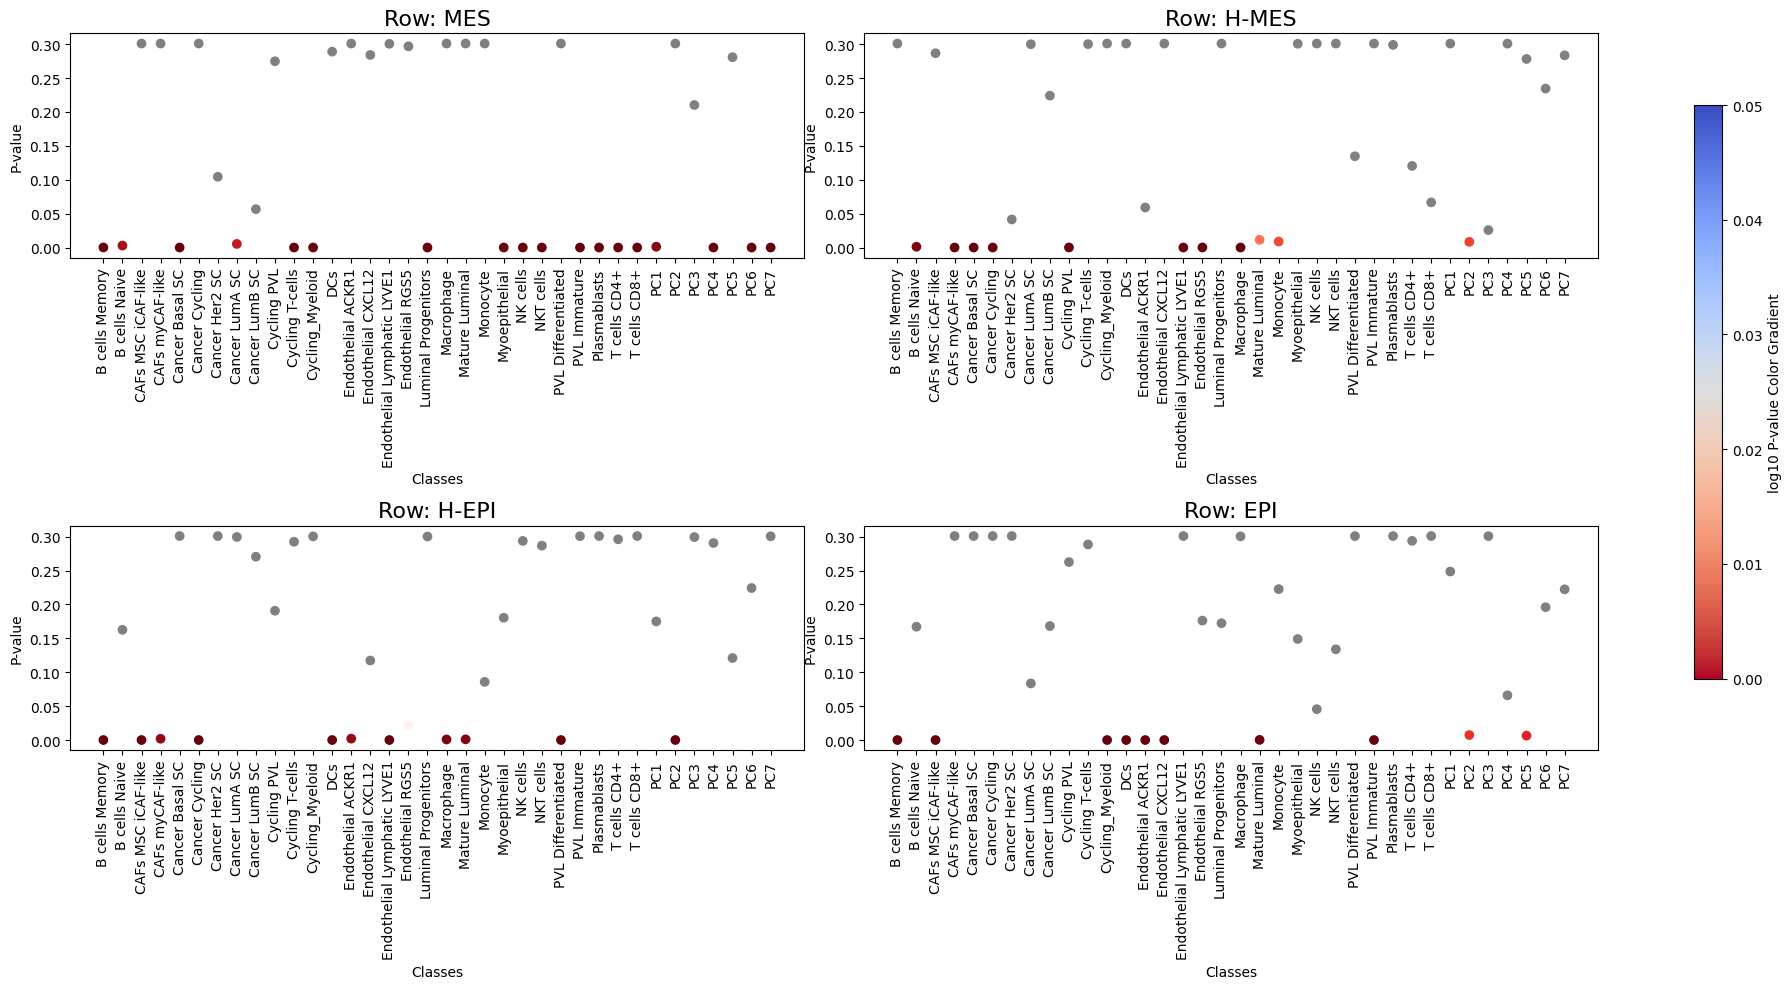

In [11]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

directory = r"C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results"

csv_files = glob.glob(os.path.join(directory, '*emt_300.csv'))

df = pd.read_csv(csv_files[0], index_col=0)

# Set up the subplot grid: 2 columns and as many rows as needed
n_rows = int(np.ceil(len(df) / 2))  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(20, 10))

# Flatten axes to easily iterate over them
axes = axes.flatten()

# Set up a color map: red to blue
cmap = cm.get_cmap('coolwarm_r')

# Normalize the p-values to use for color mapping
norm = mcolors.Normalize(vmin=np.min(df.values.astype(float)), vmax=np.max(df.values.astype(float)))

# Loop over each row in the dataframe
for idx, (row_name, row_data) in enumerate(df.iterrows()):
    p_values = row_data.values.astype(float)

    # Create an array of x-values (indices)
    x = np.arange(len(p_values))

    # Rename row_name 0 to EPI, 1 to H-EPI, 2 to H-MES, 3 to MES
    if row_name == 0:
        row_name = 'EPI'
    elif row_name == 1:
        row_name = 'H-EPI'
    elif row_name == 2:
        row_name = 'H-MES'
    elif row_name == 3:
        row_name = 'MES'

    # Plot on the corresponding axis
    ax = axes[idx]
    
    # Get colors for each p-value based on the colormap
    colors = []
    for p in p_values:
        if p < 0.05:
            norm = mcolors.Normalize(vmin=0, vmax=0.05)  # Standard normalization
            inverted_value = 1 - norm(p)  # Invert normalized value (0 -> 1, 0.05 -> 0)
            colors.append(red_cmap(inverted_value))  
        else:
            # Non-significant p-values are gray
            colors.append('gray')
    p_values = np.log10(p_values + 1)
    # Plot each point with its corresponding color
    scatter = ax.scatter(x, p_values, c=colors, cmap='coolwarm')

    ax.set_title(f'Row: {row_name}', fontsize=16)
    ax.set_ylabel('P-value')
    ax.set_xlabel('Classes')
    #ax.set_yscale('log')  # Set y-axis to logarithmic scale

    # Rotate the x-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels(df.columns, rotation=90)

# Hide any unused subplots if df has an odd number of rows
if len(df) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout to avoid overlapping
plt.tight_layout()

# Add a color bar to show the color gradient mapping to p-values
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes, orientation='vertical', shrink=0.8)
cbar.set_label('log10 P-value Color Gradient')
#save as PDF
plt.savefig('emt_node_pred_4_states_log.pdf', format='pdf')
# Show the plot
plt.show()


C:\Users\ellwi\AppData\Local\Temp\ipykernel_23372\2558661983.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm_r')
C:\Users\ellwi\AppData\Local\Temp\ipykernel_23372\2558661983.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x, p_values, c=colors, cmap='coolwarm')


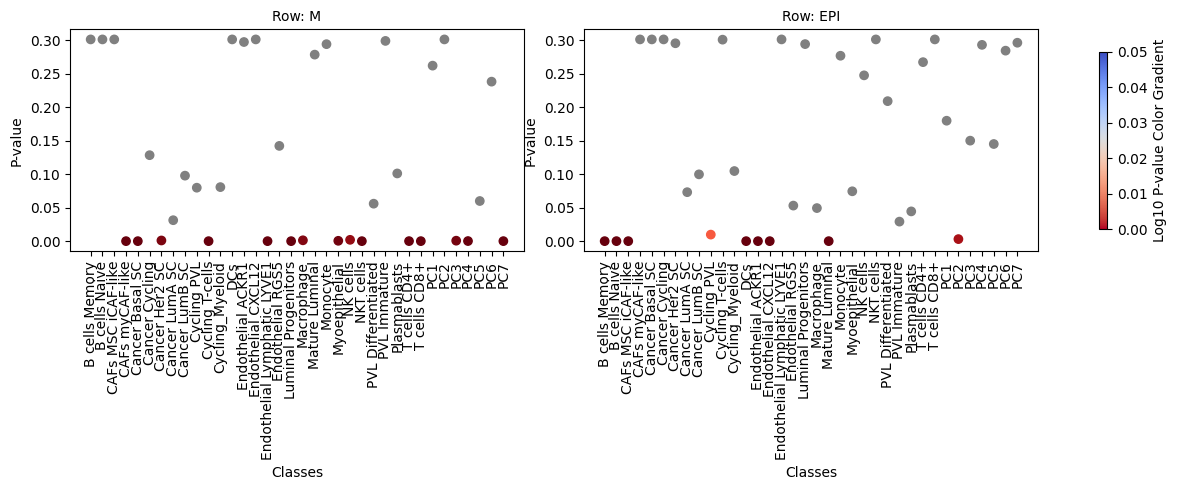

In [ ]:

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

directory = r"C:\Users\ellwi\Documents\GitHub\graph_prediction\files"

csv_files = glob.glob(os.path.join(directory, '*emt_two_labels.csv'))

df = pd.read_csv(csv_files[0], index_col=0)

# Set up the subplot grid: 2 columns and as many rows as needed
n_rows = int(np.ceil(len(df) / 2))  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(13, 5))

# Flatten axes to easily iterate over them
axes = axes.flatten()

# Set up a color map: red to blue
cmap = cm.get_cmap('coolwarm_r')

# Normalize the p-values to use for color mapping
norm = mcolors.Normalize(vmin=np.min(df.values.astype(float)), vmax=np.max(df.values.astype(float)))

# Loop over each row in the dataframe
for idx, (row_name, row_data) in enumerate(df.iterrows()):
    p_values = row_data.values.astype(float)

    # Create an array of x-values (indices)
    x = np.arange(len(p_values))

    # Rename row_name 0 to EPI, 1 to H-EPI, 2 to H-MES, 3 to MES
    if row_name == 0:
        row_name = 'EPI'
    elif row_name == 1:
        row_name = 'M'

    # Plot on the corresponding axis
    ax = axes[idx]
    
    colors = []
    for p in p_values:
        if p < 0.05:
            norm = mcolors.Normalize(vmin=0, vmax=0.05)  # Standard normalization
            inverted_value = 1 - norm(p)  # Invert normalized value (0 -> 1, 0.05 -> 0)
            colors.append(red_cmap(inverted_value))  
        else:
            # Non-significant p-values are gray
            colors.append('gray')
    p_values = np.log10(p_values + 1)
    # Plot each point with its corresponding color
    scatter = ax.scatter(x, p_values, c=colors, cmap='coolwarm')

    ax.set_title(f'Row: {row_name}', fontsize=10)
    ax.set_ylabel('P-value')
    ax.set_xlabel('Classes')
    #ax.set_yscale('log')  # Set y-axis to logarithmic scale

    # Rotate the x-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels(df.columns, rotation=90)

# Hide any unused subplots if df has an odd number of rows
if len(df) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout to avoid overlapping
plt.tight_layout()
#set fig size
# Add a color bar to show the color gradient mapping to p-values
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes, orientation='vertical', shrink=0.8)
cbar.set_label('Log10 P-value Color Gradient')
#save as PDF
#plt.savefig('figures/emt_2_states_node_pred.pdf', format='pdf')
# Show the plot
plt.show()


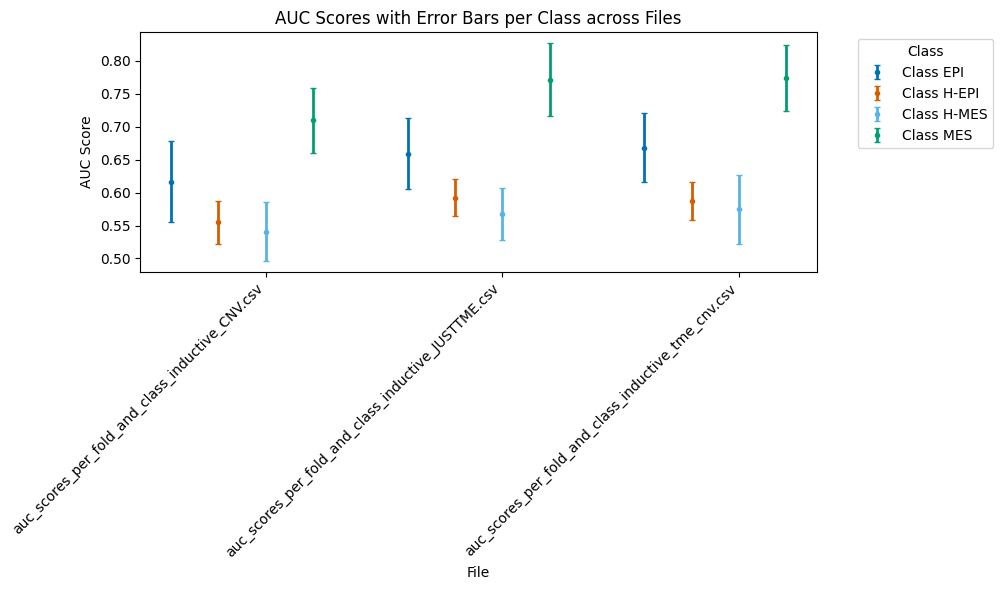

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib.colors import ListedColormap

csv_path = r"C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results"

# Load all CSV files that start with "auc_scores_per_fold"
csv_files = glob.glob(os.path.join(csv_path, "auc_scores_per_fold*.csv"))
#if file ends in inductive.csv remove
csv_files = [file for file in csv_files if not file.endswith('inductive.csv')]
# Initialize an empty list to store the dataframes
dfs = []

# Read each CSV file into a dataframe and append to the list
for file in csv_files:
    df = pd.read_csv(file)
    df['File'] = os.path.basename(file)  # Add a new column for the file name
    dfs.append(df)

# Concatenate all dataframes
combined_df = pd.concat(dfs)

# Group by 'Class' and 'File' to calculate mean and std
grouped = combined_df.groupby(['Class', 'File'])['AUC'].agg(['mean', 'std']).reset_index()

#Rename Class 0 to EPI, 1, to H-EPI, 2 TO H-MES, 3 to MES
grouped['Class'] = grouped['Class'].map({0: 'EPI', 1: 'H-EPI', 2: 'H-MES', 3: 'MES'})

# Plotting
labels = grouped['Class'].unique()  # The unique class labels
files = grouped['File'].unique()    # The unique file names

# Create a color map for the labels

color_blind_palette = ["#0072B2", "#D55E00", "#56B4E9", "#009E73", "#F0E442", "#E69F00", "#CC79A7"]
colors = ListedColormap(color_blind_palette)

# X-axis positions for each file
x_positions = np.arange(len(files))

# Offset each class slightly so they are spaced out horizontally
offset = 0.2 
plt.figure(figsize=(10, 6))

for i, label in enumerate(labels):
    # Filter data for the current label
    label_data = grouped[grouped['Class'] == label]
    
    # Apply offset for the label
    offset_positions = x_positions + (i - len(labels) / 2) * offset
    
    # Plot the mean with error bars (std) for each file
    plt.errorbar(
        offset_positions,  # X axis - positions with offset
        label_data['mean'],  # Y axis - mean AUC score
        yerr=label_data['std'],  # Error bars - std of AUC
        fmt='o', label=f'Class {label}', color=colors(i),
        elinewidth=2, capsize=2, markersize=3
    )

# X-axis file names (labels for each file)
plt.xticks(x_positions, files, rotation=45, ha="right")

# Add labels and title
plt.xlabel('File')
plt.ylabel('AUC Score')
plt.title('AUC Scores with Error Bars per Class across Files')
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
#save
plt.savefig('figures/auc_scores_per_class_emt.pdf', format='pdf')
# Show the plot
plt.tight_layout()
plt.show()


trans vs inductive

C:\Users\ellwi\AppData\Local\Temp\ipykernel_21492\411436300.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(labels))
C:\Users\ellwi\AppData\Local\Temp\ipykernel_21492\411436300.py:79: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


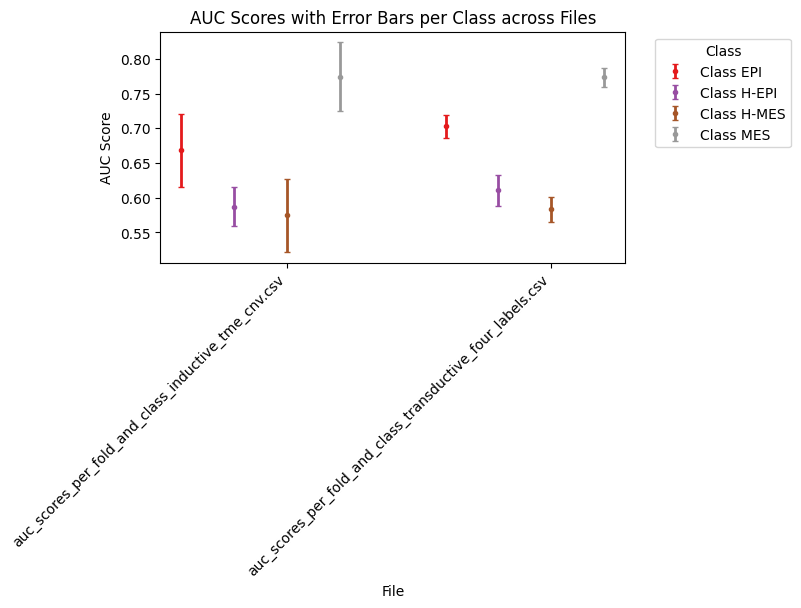

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
#read in auc_scores_per_fold_and_class_transductive_four_labels.csv
auc_scores_transductive=r"C:\Users\ellwi\Documents\GitHub\graph_prediction\Final_results\auc_scores_per_fold_and_class_transductive_four_labels.csv"

auc_scores_inductive=r"C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\auc_scores_per_fold_and_class_inductive_tme_cnv.csv"

csv_path = r"C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results"

# Load all CSV files that start with "auc_scores_per_fold"
csv_files = glob.glob(os.path.join(csv_path, "auc_scores_per_fold*.csv"))
#if file ends in inductive.csv remove
csv_files = [file for file in csv_files if not file.endswith('inductive.csv')]
# Initialize an empty list to store the dataframes
dfs = []

df=pd.read_csv(auc_scores_inductive)
df['File'] = os.path.basename(auc_scores_inductive)  # Add a new column for the file name
dfs.append(df)
df=pd.read_csv(auc_scores_transductive)
df['File'] = os.path.basename(auc_scores_transductive)  # Add a new column for the file name
dfs.append(df)

# Concatenate all dataframes
combined_df = pd.concat(dfs)

# Group by 'Class' and 'File' to calculate mean and std
grouped = combined_df.groupby(['Class', 'File'])['AUC'].agg(['mean', 'std']).reset_index()

#Rename Class 0 to EPI, 1, to H-EPI, 2 TO H-MES, 3 to MES
grouped['Class'] = grouped['Class'].map({0: 'EPI', 1: 'H-EPI', 2: 'H-MES', 3: 'MES'})

# Plotting
labels = grouped['Class'].unique()  # The unique class labels
files = grouped['File'].unique()    # The unique file names

# Create a color map for the labels
colors = plt.cm.get_cmap('Set1', len(labels))

# X-axis positions for each file
x_positions = np.arange(len(files))

# Offset each class slightly so they are spaced out horizontally
offset = 0.2  
plt.figure(figsize=(6, 3))

for i, label in enumerate(labels):
    # Filter data for the current label
    label_data = grouped[grouped['Class'] == label]
    
    # Apply offset for the label
    offset_positions = x_positions + (i - len(labels) / 2) * offset
    
    # Plot the mean with error bars (std) for each file

    plt.errorbar(
        offset_positions,  # X axis - positions with offset
        label_data['mean'],  # Y axis - mean AUC score
        yerr=label_data['std'],  # Error bars - std of AUC
        fmt='o', label=f'Class {label}', color=colors(i),
        elinewidth=2, capsize=2, markersize=3
    )

# X-axis file names (labels for each file)
plt.xticks(x_positions, files, rotation=45, ha="right")

# Add labels and title
plt.xlabel('File')
plt.ylabel('AUC Score')
plt.title('AUC Scores with Error Bars per Class across Files')
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
#save as pdf
plt.savefig(r"C:\Users\ellwi\Documents\GitHub\graph_prediction\figure_code\figures\AUC_scores_per_class_across_files.pdf")
# Show the plot
plt.tight_layout()
plt.show()


GNN regression

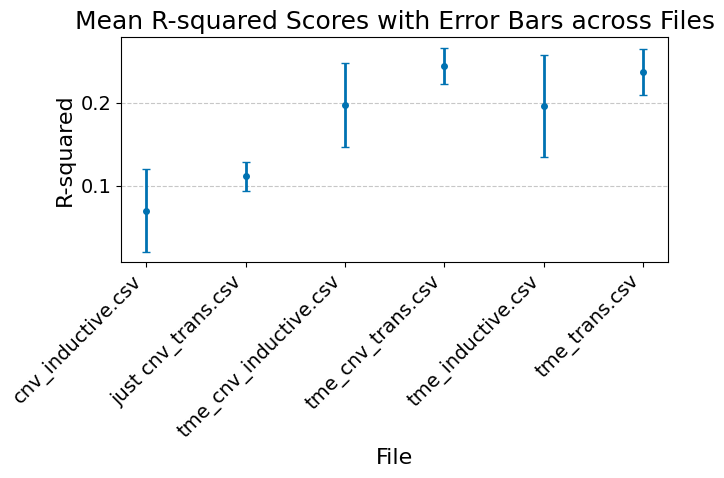

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib.colors import ListedColormap

csv_path = r"C:\Users\ellwi\Documents\GitHub\graph_prediction\Final_results\evalation_gnn_regression"

# Load all CSV files that start with "auc_scores_per_fold"
csv_files = glob.glob(os.path.join(csv_path, "*.csv"))

# Initialize an empty list to store the dataframes
dfs = []

# Read each CSV file into a dataframe and append to the list
for file in csv_files:
    df = pd.read_csv(file)
    df['File'] = os.path.basename(file)  # Add a new column for the file name
    # Remove "evaluation_scores_per_fold"
    df['File'] = df['File'].str.replace('evaluation_scores_per_fold_', '')
    dfs.append(df)

# Concatenate all dataframes
combined_df = pd.concat(dfs)

# Group by 'File' to calculate mean and std of 'R-squared'
grouped = combined_df.groupby('File')['R-squared'].agg(['mean', 'std']).reset_index()

# Create a list of file names in the desired order
desired_order = ['cnv_inductive.csv', 'just cnv_trans.csv', 'tme_inductive.csv', 'tme_trans.csv', 'tme_cnv_inductive.csv', 'tme_cnv_trans.csv']

# Ensure the 'File' column follows the specified order
grouped['File'] = pd.Categorical(grouped['File'], categories=desired_order, ordered=True)

# X-axis positions for each file
x_positions = np.arange(len(grouped['File']))

# Create a color map for consistency (optional)
color_blind_palette = ["#0072B2", "#D55E00", "#56B4E9", "#009E73", "#F0E442", "#E69F00", "#CC79A7"]
colors = color_blind_palette[:len(grouped)]  # Use as many colors as needed

# Set global font size
plt.rcParams.update({'font.size': 14})  # Increase font size globally

# Plot means with error bars
plt.figure(figsize=(7, 5))
plt.errorbar(
    x_positions,
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',
    color='#0072B2',  # Consistent color for all points
    elinewidth=2,
    capsize=3,
    markersize=4
)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed grid lines for the y-axis

# X-axis labels for each file
plt.xticks(x_positions, grouped['File'], rotation=45, ha="right", fontsize=14)

# Add labels and title with specific font sizes
plt.xlabel('File', fontsize=16)
plt.ylabel('R-squared', fontsize=16)
plt.title('Mean R-squared Scores with Error Bars across Files', fontsize=18)

# Save the figure
plt.tight_layout()
plt.savefig('figures/R-squared_per_file.pdf', format='pdf')

# Show the plot
plt.show()


# Plot edges

Network graphs

C:\Users\ellwi\AppData\Local\Temp\ipykernel_25652\1172775808.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Processing file: C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\emt_four_states_edge_march\edge_0emt_states_four_states_avg_importance_and_p_values0903.csv
Processing file: C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\emt_four_states_edge_march\edge_1emt_states_four_states_avg_importance_and_p_values0903.csv
Processing file: C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\emt_four_states_edge_march\edge_2emt_states_four_states_avg_importance_and_p_values0903.csv
Processing file: C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\emt_four_states_edge_march\edge_3emt_states_four_states_avg_importance_and_p_values0903.csv


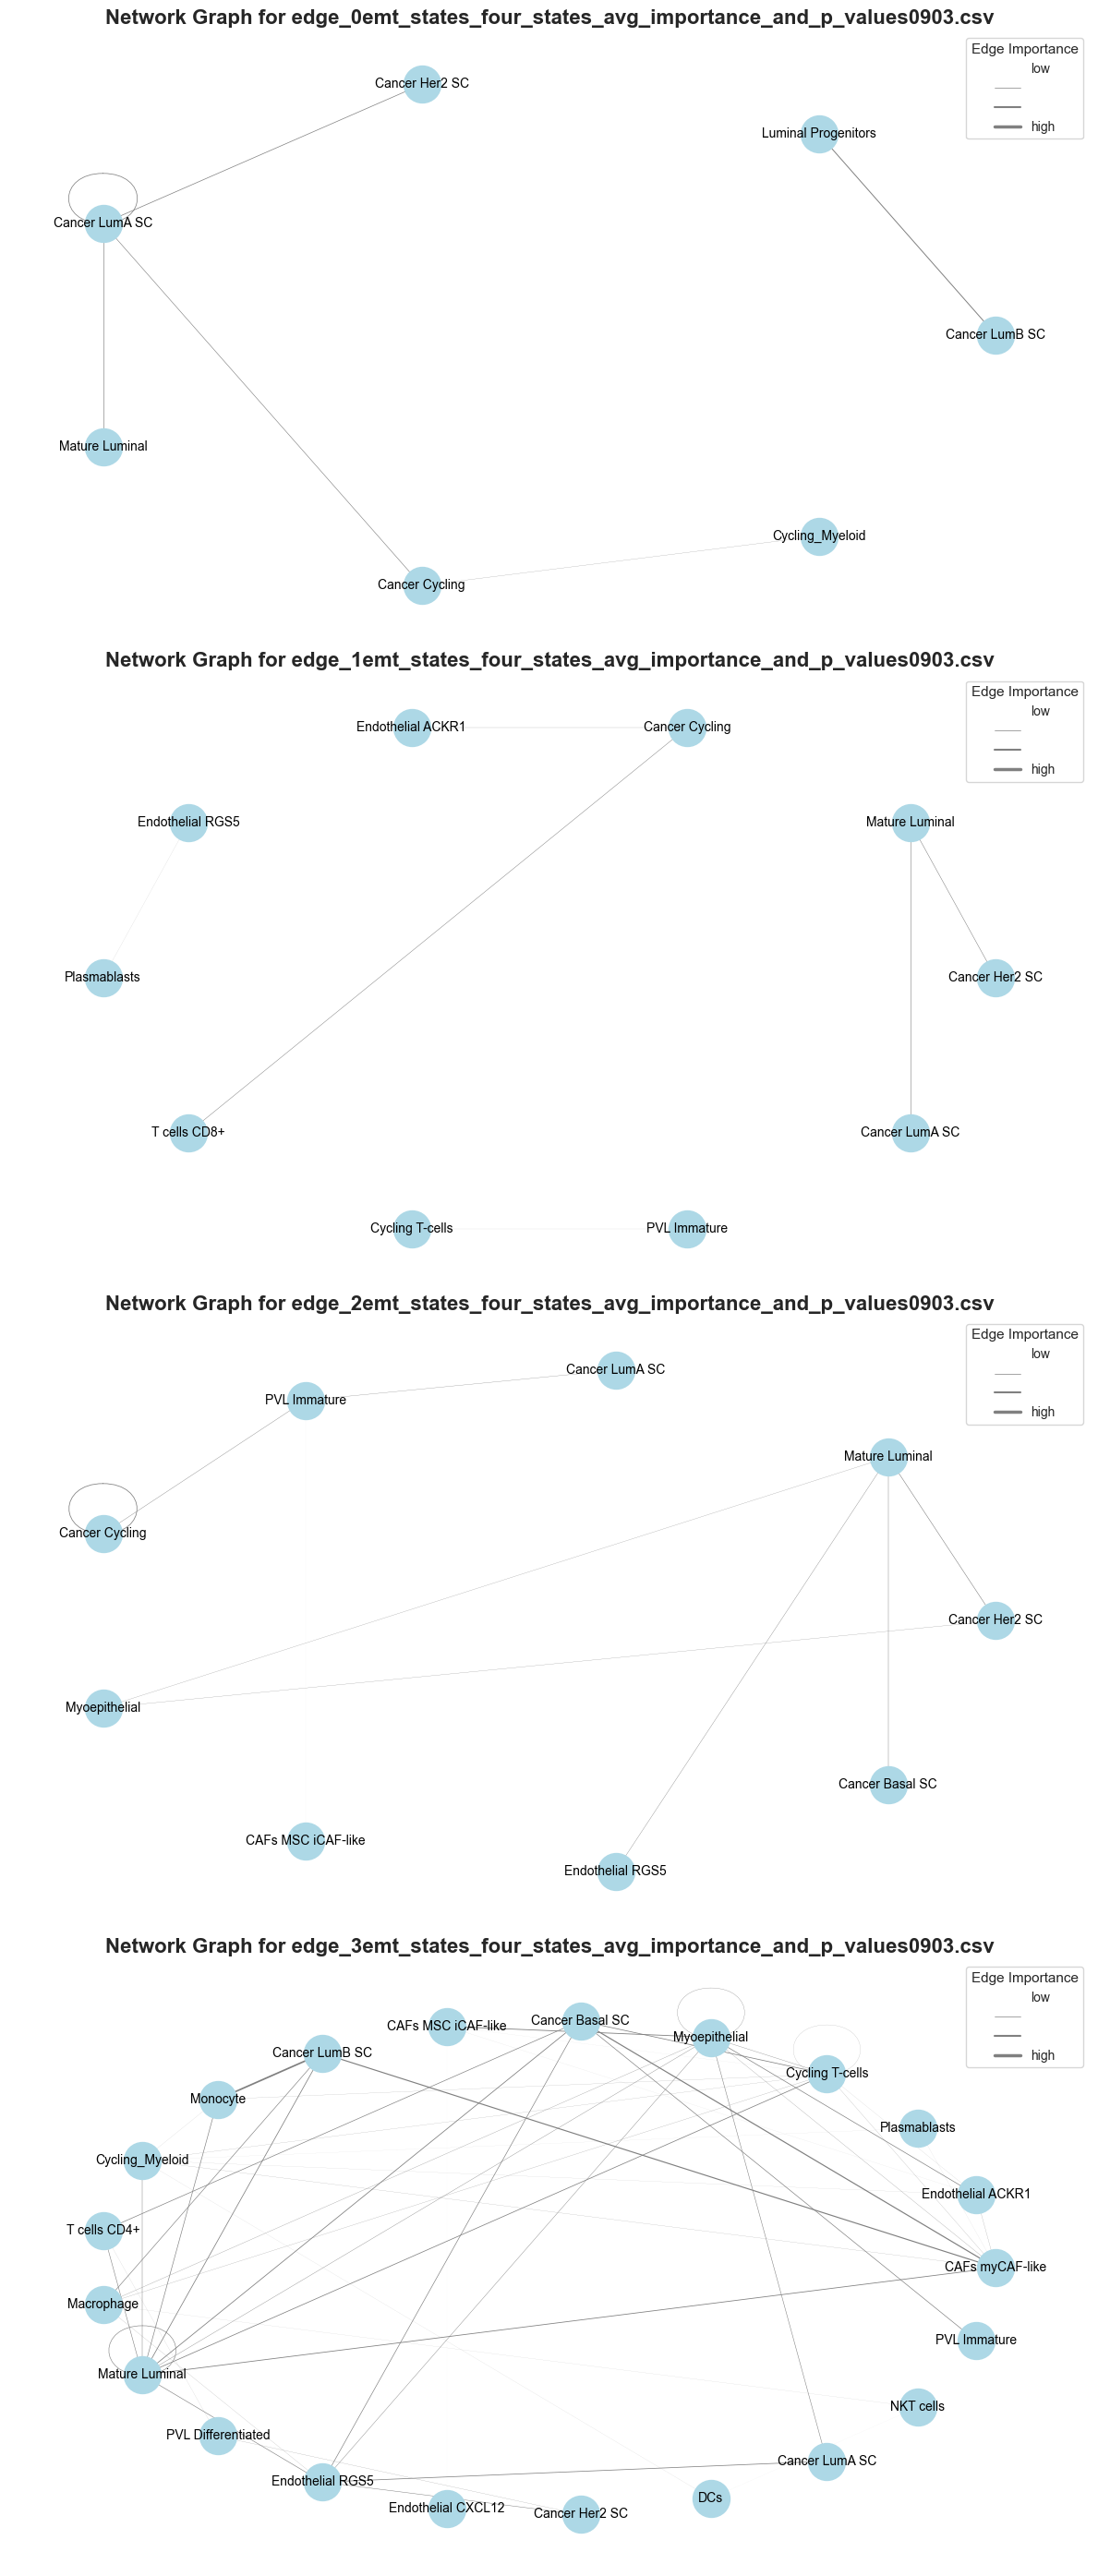

In [13]:
import os
import glob
import ast
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Use a modern style for better aesthetics
plt.style.use('seaborn-whitegrid')

# Directory where the CSV files are stored
directory = r"C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\emt_four_states_edge_march"
csv_files = glob.glob(os.path.join(directory, '*four_states_avg_importance_and_p_values0903.csv'))

# Function to convert string to tuple
def to_tuple(x):
    try:
        return ast.literal_eval(x)
    except Exception:
        return None

# Create a figure with one subplot per file (vertical layout)
n_files = len(csv_files)
fig, axes = plt.subplots(n_files, 1, figsize=(12, n_files * 7))
if n_files == 1:
    axes = [axes]

for ax, file in zip(axes, csv_files):
    print(f"Processing file: {file}")
    
    # Read CSV file
    df = pd.read_csv(file)
    
    # Convert the Cell_Type_Pair from a string to a tuple and split it into two columns
    df['Cell_Type_Pair'] = df['Cell_Type_Pair'].apply(to_tuple)
    df[['Cell_Type_1', 'Cell_Type_2']] = pd.DataFrame(df['Cell_Type_Pair'].tolist(), index=df.index)
    
    # Filter for significant interactions (p_value < 0.05)
    df_sig = df[df['p_value'] < 0.05]
    
    # Create a network graph using NetworkX
    G = nx.Graph()
    for _, row in df_sig.iterrows():
        source = row['Cell_Type_1']
        target = row['Cell_Type_2']
        weight = row['Avg_Importance_Non_Permutation']
        G.add_edge(source, target, weight=weight)
    
    # Use a circular layout for positioning nodes
    pos = nx.circular_layout(G)
    
    # Extract edge weights and scale them for visualization
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    scale_factor = 5000  # Adjust this factor to change edge thickness
    edge_widths = [w * scale_factor for w in weights]
    
    # Draw nodes with improved aesthetics
    nx.draw_networkx_nodes(
        G, pos, ax=ax,
        node_size=800,
        node_color='lightblue',
        linewidths=1.5
    )
    
    # Draw edges with thickness scaled by interaction importance
    nx.draw_networkx_edges(
        G, pos, ax=ax,
        width=edge_widths,
        edge_color='gray'
    )
    
    # Draw labels with improved font properties
    nx.draw_networkx_labels(
        G, pos, ax=ax,
        font_size=10,
        font_color='black'    )
    
    # Set title and adjust aesthetics of the axis
    ax.set_title(f'Network Graph for {os.path.basename(file)}', fontsize=16, fontweight='bold')
    ax.set_facecolor('whitesmoke')
    ax.axis('off')
from matplotlib.lines import Line2D

# Example weights to show in the legend
legend_weights = [0,0.0001, 0.0003, 0.0005]
key=['low', '','', 'high']
legend_lines = [
    Line2D(
        [0], [0],
        color='gray',
        linewidth=w * scale_factor,
        label=f'{k}'
    ) for w, k in zip(legend_weights, key)
]

# Add the legend to each subplot
for ax in axes:
    ax.legend(
        handles=legend_lines,
        loc='upper right',
        title='Edge Importance',
        fontsize=10,
        title_fontsize=11,
        frameon=True
    )

plt.tight_layout()
plt.savefig('network_graph.pdf', format='pdf')
plt.show()


Network edges MERFISH

C:\Users\ellwi\AppData\Local\Temp\ipykernel_12176\3784476350.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Processing file: C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\merfish_march_all\edge_Astro_avg_importance_and_p_values2702.csv
Processing file: C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\merfish_march_all\edge_Endo_avg_importance_and_p_values2702.csv
Processing file: C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\merfish_march_all\edge_L2_3 IT_avg_importance_and_p_values2702.csv
Processing file: C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\merfish_march_all\edge_L4_5 IT_avg_importance_and_p_values2702.csv
Processing file: C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\merfish_march_all\edge_L5 ET_avg_importance_and_p_values2702.csv
Processing file: C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\merfish_march_all\edge_L5 IT_avg_importance_and_p_values2702.csv
Processing file: C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\merfish_march_all\edge_L5_6 NP_av

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


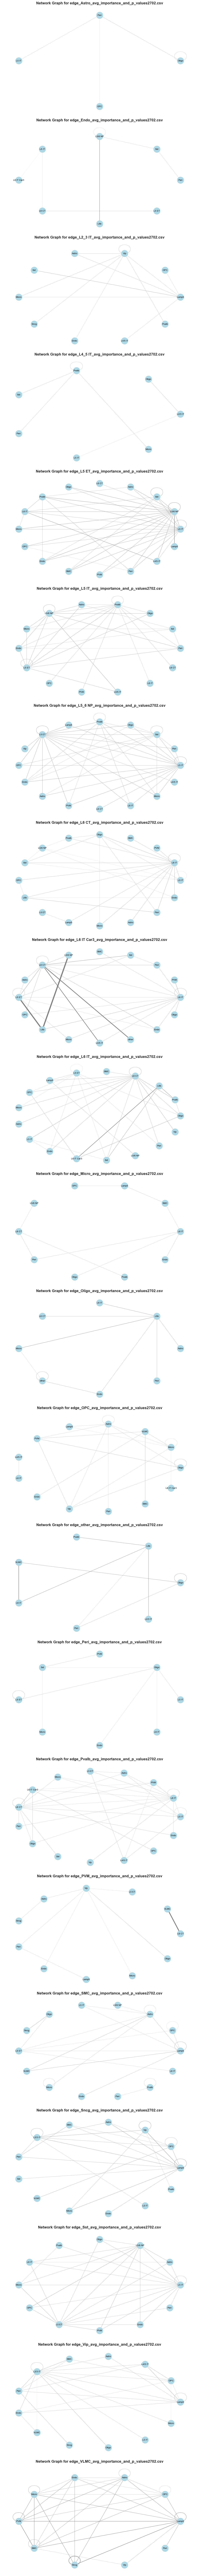

In [ ]:
import os
import glob
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


import os
import glob
import ast
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')


directory = r"C:\Users\ellwi\Documents\GitHub\graph_prediction\merfish_results\merfish_march_all"
# Find all files ending with "emt_300.csv"
csv_files = glob.glob(os.path.join(directory, '*_avg_importance_and_p_values2702.csv'))

# Function to convert string to tuple
def to_tuple(x):
    try:
        return ast.literal_eval(x)
    except Exception:
        return None

# Create a figure with one subplot per file (vertical layout)
n_files = len(csv_files)
fig, axes = plt.subplots(n_files, 1, figsize=(12, n_files * 7))
if n_files == 1:
    axes = [axes]

for ax, file in zip(axes, csv_files):
    print(f"Processing file: {file}")
    
    # Read CSV file
    df = pd.read_csv(file)
    
    # Convert the Cell_Type_Pair from a string to a tuple and split it into two columns
    df['Cell_Type_Pair'] = df['Cell_Type_Pair'].apply(to_tuple)
    df[['Cell_Type_1', 'Cell_Type_2']] = pd.DataFrame(df['Cell_Type_Pair'].tolist(), index=df.index)
    
    # Filter for significant interactions (p_value < 0.05)
    df_sig = df[df['p_value'] < 0.05]
    
    # Create a network graph using NetworkX
    G = nx.Graph()
    for _, row in df_sig.iterrows():
        source = row['Cell_Type_1']
        target = row['Cell_Type_2']
        weight = row['Avg_Importance_Non_Permutation']
        G.add_edge(source, target, weight=weight)
    
    # Use a circular layout for positioning nodes
    pos = nx.circular_layout(G)
    
    # Extract edge weights and scale them for visualization
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    scale_factor = 5000  # Adjust this factor to change edge thickness
    edge_widths = [w * scale_factor for w in weights]
    
    # Draw nodes with improved aesthetics
    nx.draw_networkx_nodes(
        G, pos, ax=ax,
        node_size=800,
        node_color='lightblue',
        linewidths=1.5
    )
    
    # Draw edges with thickness scaled by interaction importance
    nx.draw_networkx_edges(
        G, pos, ax=ax,
        width=edge_widths,
        edge_color='gray'
    )
    
    # Draw labels with improved font properties
    nx.draw_networkx_labels(
        G, pos, ax=ax,
        font_size=10,
        font_color='black')
    
    # Set title and adjust aesthetics of the axis
    ax.set_title(f'Network Graph for {os.path.basename(file)}', fontsize=16, fontweight='bold')
    ax.set_facecolor('whitesmoke')
    ax.axis('off')

plt.tight_layout()
plt.savefig('figures/network_graph_merfish_march.pdf', format='pdf')
plt.show()

